Pekerjaan Muhammad Ulil 'Azmi

In [90]:
# Mengimpor library-library yang digunakan
import numpy as np # untuk aljabar linear
import pandas as pd # pemrosesan data, pembacaan file CSV I/O (contoh: pd.read_csv)
import matplotlib.pyplot as plt # untuk visualisasi
import datetime # untuk data atau pengolahan data berupa tanggal dan waktu

In [91]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, Lambda
import tensorflow as tf

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#Menyesuaikan path dengan lokasi dataset yang digunakan
dataset=pd.read_csv('/content/drive/MyDrive/Proa-ML/Demo/Dataset/Sample - Superstore.csv', encoding='windows-1252')

In [94]:
#Melihat informai dari dataset yang kita miliki
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [95]:
dataset.head() # Melihat bagian kepala (5 data paling atas dari dataset kita)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [96]:
dataset.Category.unique() # Melihat anggota unik dari kolom "Category"

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [97]:
dataset["Ship Mode"].unique() # Melihat anggota unik dari kolom "Ship Mode"

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [98]:
dataset["Segment"].unique() # Melihat anggota unik dari kolom "Segment"

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [99]:
dataset["Region"].unique() # Melihat anggota unik dari kolom "Region"

array(['South', 'West', 'Central', 'East'], dtype=object)

In [100]:
dataset.shape # Melihat bentuk dari dataset

(9994, 21)

In [101]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%m/%d/%Y') #Mengonversi tipe data dari kolom 'Order Date' atau tanggal pemesanan menjadi format tanggal.
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%m/%d/%Y') #Mengonversi tipe data dari kolom 'Ship Date' atau tanggal pengiriman menjadi format tanggal.
dataset.info() # Melihat informasi dataset setelah konversi type data dari kolom tanggal menjadi bertipe format tanggal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [102]:
dataset['Order Date'].min(), dataset['Order Date'].max() # Melihat jangka waktu dari dataset yang dimiliki

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [103]:
dataset_sales = dataset

In [104]:
dataset_sales = dataset_sales[['Order Date','Sales']]

In [105]:
dataset_sales.head()


,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [106]:
dataset_sales = dataset_sales.sort_values('Order Date')
dataset_sales = dataset_sales.groupby('Order Date')['Sales'].sum().reset_index()
dataset_sales.head()


,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [107]:
dataset_sales = dataset_sales.set_index('Order Date')
dataset_sales.head()


,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


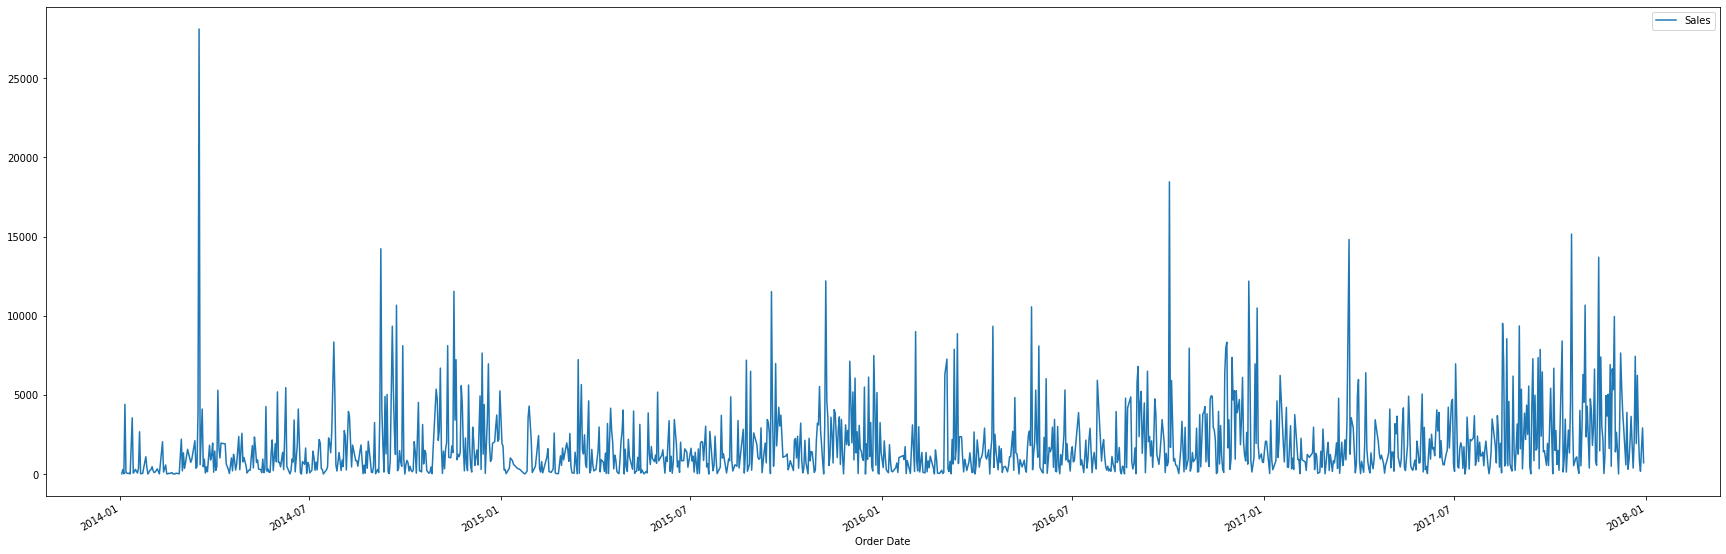

In [108]:
dataset_sales.plot(figsize=(30, 10));

In [109]:
dataset_sales =  pd.DataFrame(dataset_sales['Sales'].resample('D').mean()) #Data diresample dengan aturan D alias hari
dataset_sales = dataset_sales.interpolate(method='linear') #Fungsi interpolate() digunakan untuk melakukan interpolasi secara linear.

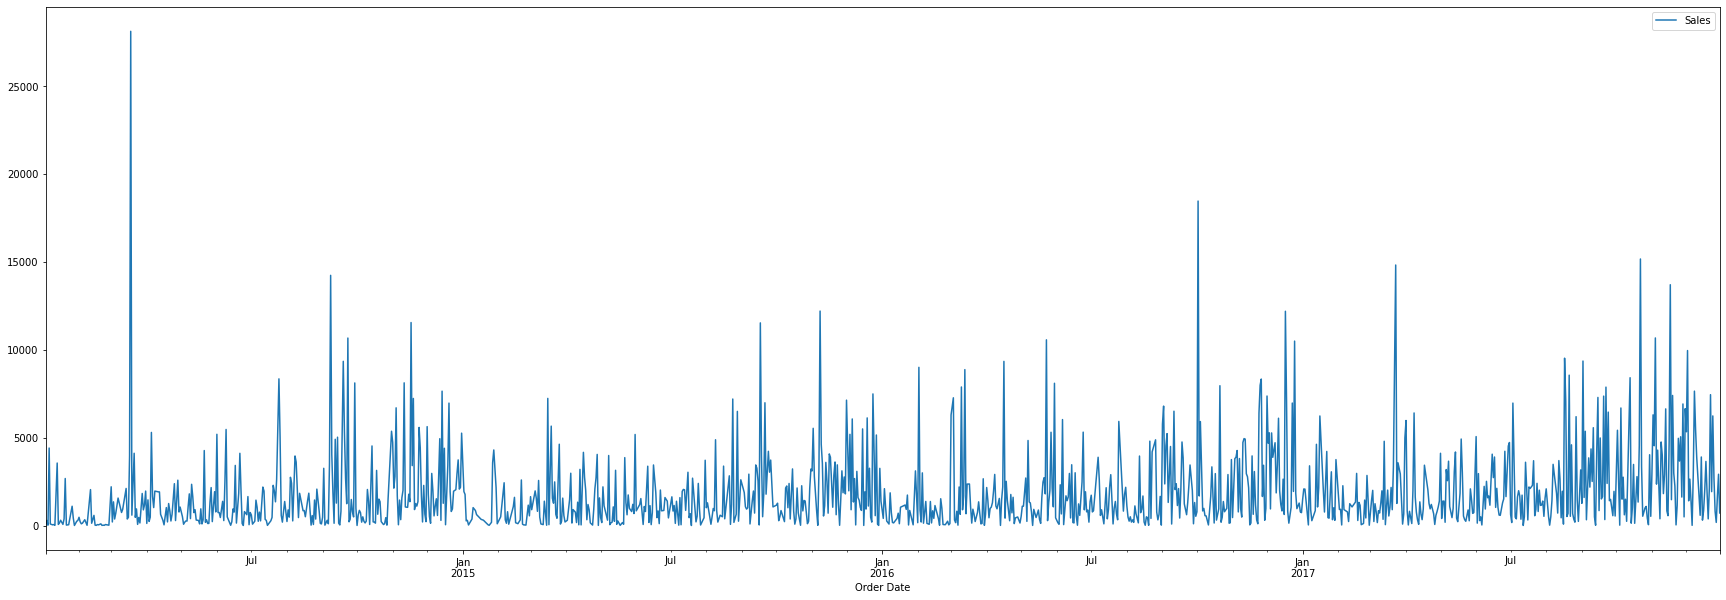

In [110]:
dataset_sales.plot(figsize=(30, 10));

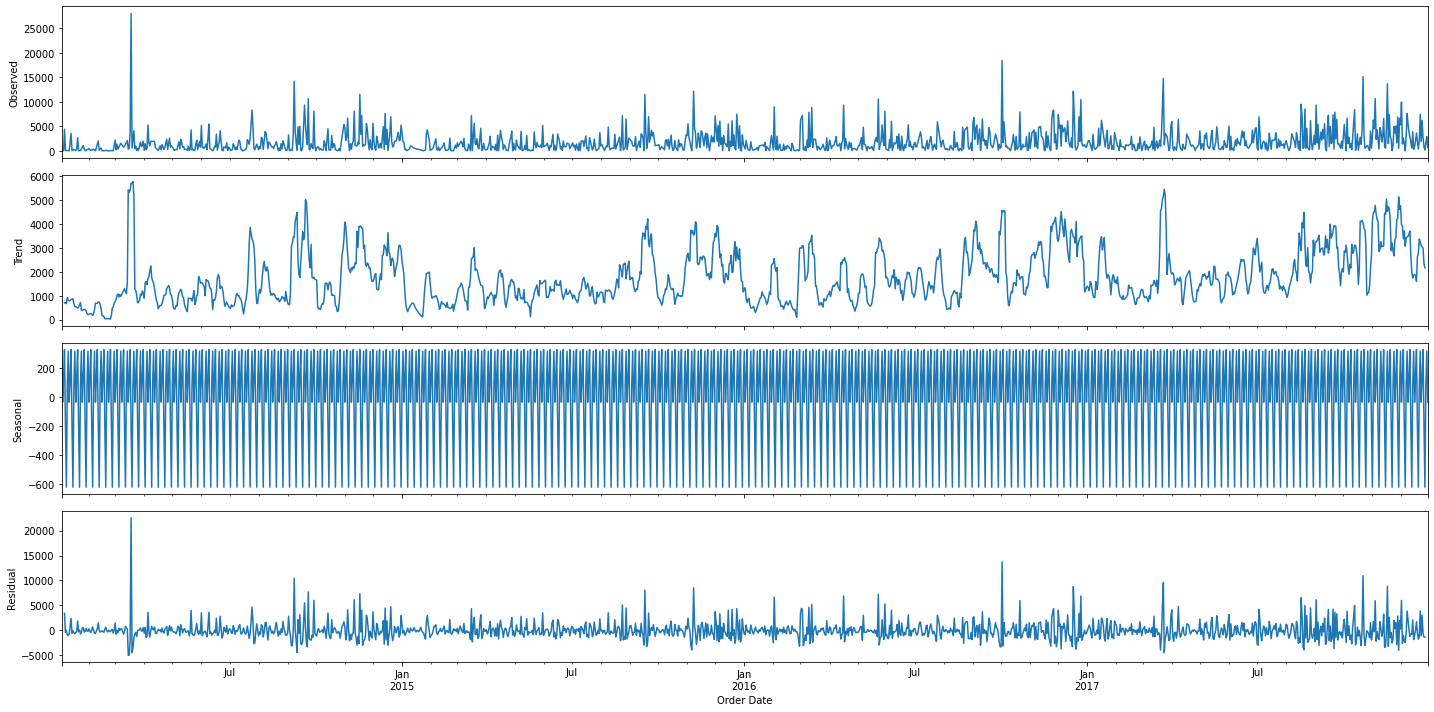

In [111]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset_sales, model='additive') # Mengurai data deret waktu menjadi Tren dan Seasonalitas
fig = decomposition.plot()
plt.show();

In [112]:
order_dates = dataset_sales.index.values
sales  = dataset_sales['Sales'].values

In [113]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

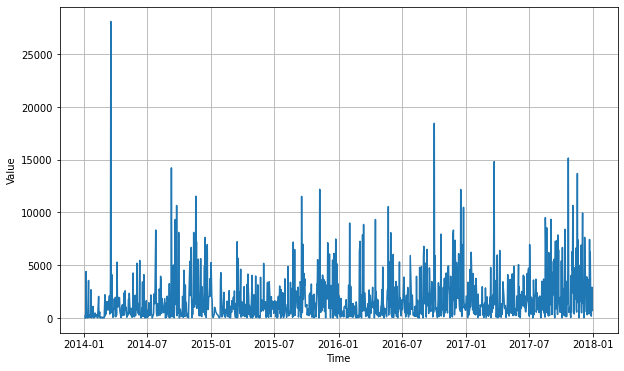

In [114]:
plt.figure(figsize=(10, 6))
plot_series(order_dates, sales)

In [115]:
sales.shape

(1458,)

In [116]:
sales_train = sales[:int(len(sales)*0.8)]
sales_valid = sales[int(len(sales)*0.8):]

In [117]:
sales_train_time = order_dates[:int(len(sales)*0.8)]
sales_valid_time = order_dates[int(len(sales)*0.8):]

In [118]:
callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


In [119]:
# Memotong atau menjendela dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [120]:
tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
window_size = 16
batch_size=64
shuffle_buffer=1000

In [121]:
# Membuat set pelatihan dan validasi
train_set = windowed_dataset(sales_train, window_size, batch_size, shuffle_buffer)
valid_set = windowed_dataset(sales_valid, window_size, batch_size, shuffle_buffer)

In [122]:
# model = tf.keras.models.Sequential([     
#   tf.keras.layers.Conv1D(filters=60, kernel_size=5,
#                       strides=1, padding="causal",
#                       activation="relu",
#                       input_shape=[None, 1]),                           
#   tf.keras.layers.LSTM(64, return_sequences=True),
#   tf.keras.layers.Dropout(0.6),
#   tf.keras.layers.LSTM(64),          
#   tf.keras.layers.Dense(30, activation="relu"),
#   tf.keras.layers.Dense(10, activation="relu"),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 400),
# ])

In [123]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=256, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 256)         1536      
                                                                 
 lstm (LSTM)                 (None, None, 60)          76080     
                                                                 
 lstm_1 (LSTM)               (None, None, 60)          29040     
                                                                 
 dense (Dense)               (None, None, 30)          1830      
                                                                 
 dense_1 (Dense)             (None, None, 10)          310       
                                                                 
 dense_2 (Dense)             (None, None, 1)           11        
                                                                 
 lambda (Lambda)             (None, None, 1)           0

In [124]:
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=5,
#                       strides=1, padding="causal",
#                       activation="relu",
#                       input_shape=[None, 1]),)
# model.add(LSTM(units = 64, return_sequences = True))
# model.add(Dropout(0.3))
# model.add(LSTM(units = 64, return_sequences = True))
# model.add(Dropout(0.3))
# model.add(LSTM(units = 64,return_sequences = True))
# model.add(Dropout(0.3))
# model.add(LSTM(units = 64))
# model.add(Dropout(0.3))
# model.add(Dense(units = 1))
# model.add(Lambda(lambda x: x * 400))

In [125]:
# model.summary()

In [126]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-03, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [127]:
history = model.fit(train_set,epochs=100, validation_data = valid_set, callbacks=callback_es)

Epoch 1/100
18/18 [==============================] - 8s 119ms/step - loss: 1292.7311 - mae: 1293.2310 - val_loss: 1793.9498 - val_mae: 1794.4498
Epoch 2/100
18/18 [==============================] - 1s 59ms/step - loss: 1231.9963 - mae: 1232.4963 - val_loss: 1790.1825 - val_mae: 1790.6825
Epoch 3/100
18/18 [==============================] - 1s 60ms/step - loss: 1246.9371 - mae: 1247.4370 - val_loss: 1877.1565 - val_mae: 1877.6565
Epoch 4/100
18/18 [==============================] - 1s 59ms/step - loss: 1235.7562 - mae: 1236.2560 - val_loss: 1814.3810 - val_mae: 1814.8810
Epoch 5/100
18/18 [==============================] - 1s 61ms/step - loss: 1231.2212 - mae: 1231.7211 - val_loss: 1796.3044 - val_mae: 1796.8044
Epoch 6/100
18/18 [==============================] - 1s 60ms/step - loss: 1230.8793 - mae: 1231.3789 - val_loss: 1797.3320 - val_mae: 1797.8320
Epoch 7/100
18/18 [==============================] - 1s 60ms/step - loss: 1230.8099 - mae: 1231.3098 - val_loss: 1801.1891 - val_mae: 1

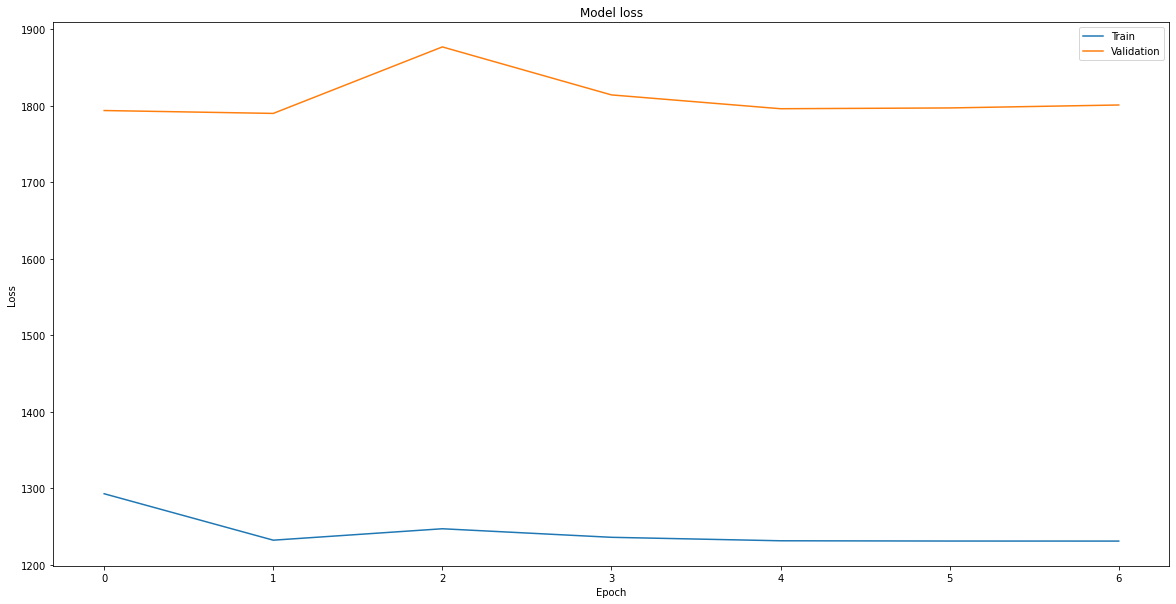

In [128]:
#Membuat plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

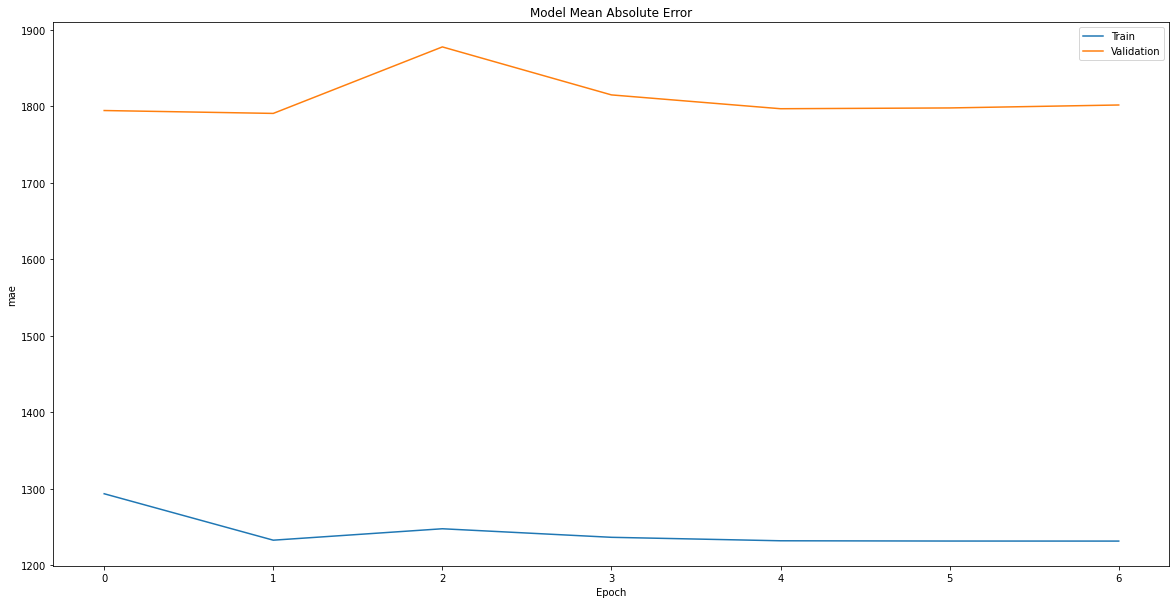

In [129]:
#Membuat plot MAE
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [130]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(16).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [131]:
rnn_forecast = model_forecast(model, sales[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[int(len(sales)*0.8) - window_size: -1, -1, 0]

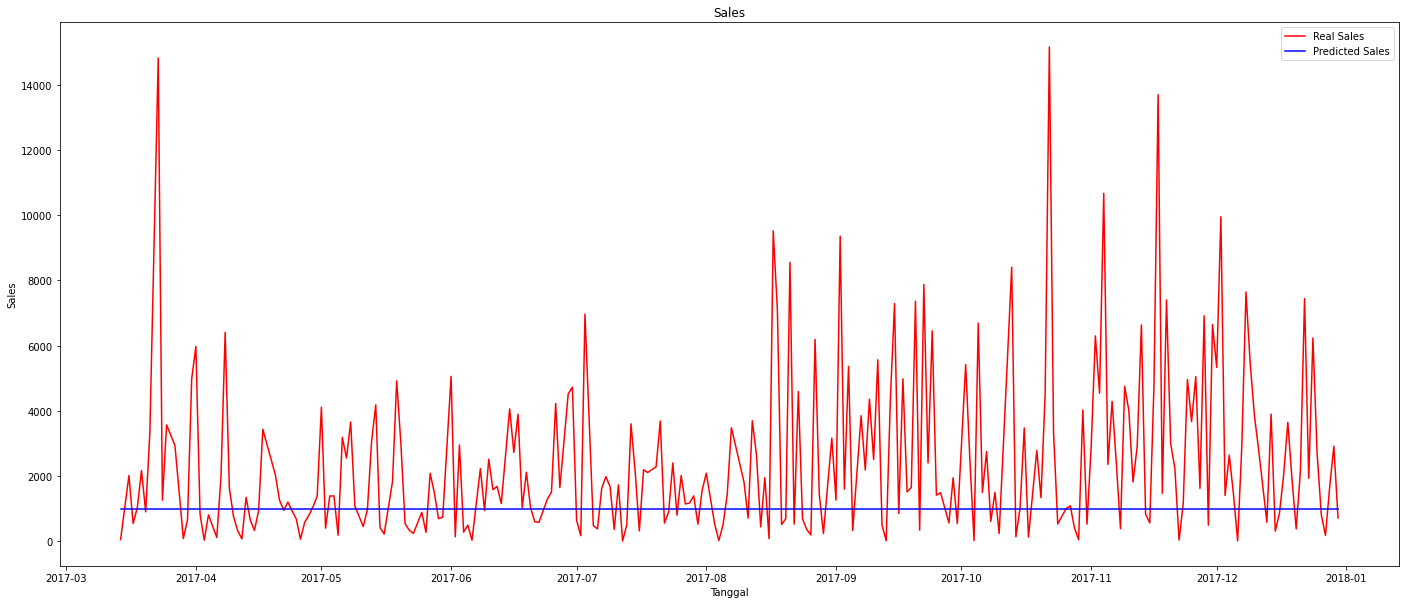

In [132]:
plt.figure(figsize=(24, 10))
plt.plot(sales_valid_time, sales_valid, color = 'red', label = 'Real Sales')
plt.plot(sales_valid_time, rnn_forecast, color = 'blue', label = 'Predicted Sales')
plt.title('Sales')
plt.xlabel('Tanggal')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [133]:
rnn_forecast.shape

(292,)

In [134]:
sales_valid.shape

(292,)

In [135]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(rnn_forecast, sales_valid)
rmse = sqrt(mse)
print('MSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(rnn_forecast, sales_valid)
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

MSE dari hasil prediksi di dalam jangka yang diketahui adalah 2867.47
MAE dari hasil prediksi di dalam jangka yang diketahui adalah 1790.5


In [136]:
sales_train_2 = dataset_sales[:int(len(sales)*0.8)]
sales_valid_2 = dataset_sales[int(len(sales)*0.8):]

In [137]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(sales_train_2)

In [138]:
# Membuat sebuah struktur data dengan 60 satuan waktu dan 1 output
X_train = []
y_train = []
for i in range(60, int(len(training_set_scaled))):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [139]:
validation_set_scaled = sc.fit_transform(sales_valid_2)

In [140]:
# Creating a data structure with 60 timesteps and 1 output
X_valid = []
y_valid = []
for i in range(60, len(validation_set_scaled)):
    X_valid.append(validation_set_scaled[i-60:i, 0])
    y_valid.append(validation_set_scaled[i, 0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

# Reshaping
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [141]:
#Cara 2

# Initialising the RNN
model2 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.3))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 64, return_sequences = True))
model2.add(Dropout(0.3))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 64,return_sequences = True))
model2.add(Dropout(0.3))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 64))
model2.add(Dropout(0.3))
# Adding the output layer
model2.add(Dense(units = 1))

In [142]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)               

In [143]:
callback_es2 = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [144]:
#Cara 2
# optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])

model2.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics=["mae"])
# Fitting the RNN to the Training set
epoch = 10 
batch_size = 32
history = model2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = epoch, batch_size = batch_size)

Epoch 1/10
35/35 [==============================] - 16s 215ms/step - loss: 0.0030 - mae: 0.0494 - val_loss: 0.0167 - val_mae: 0.1186
Epoch 2/10
35/35 [==============================] - 6s 165ms/step - loss: 0.0029 - mae: 0.0486 - val_loss: 0.0152 - val_mae: 0.1151
Epoch 3/10
35/35 [==============================] - 6s 162ms/step - loss: 0.0029 - mae: 0.0496 - val_loss: 0.0177 - val_mae: 0.1221
Epoch 4/10
35/35 [==============================] - 6s 162ms/step - loss: 0.0028 - mae: 0.0488 - val_loss: 0.0166 - val_mae: 0.1184
Epoch 5/10
35/35 [==============================] - 7s 213ms/step - loss: 0.0029 - mae: 0.0490 - val_loss: 0.0178 - val_mae: 0.1225
Epoch 6/10
35/35 [==============================] - 6s 163ms/step - loss: 0.0028 - mae: 0.0485 - val_loss: 0.0161 - val_mae: 0.1175
Epoch 7/10
35/35 [==============================] - 6s 164ms/step - loss: 0.0028 - mae: 0.0485 - val_loss: 0.0163 - val_mae: 0.1181
Epoch 8/10
35/35 [==============================] - 6s 180ms/step - loss: 0

In [148]:
predicted_sales2 = model2.predict(X_valid)
predicted_sales2 = sc.inverse_transform(predicted_sales2)

In [149]:
sales_valid_2.shape

(292, 1)

In [150]:
predicted_stock_price.shape

(232, 1)

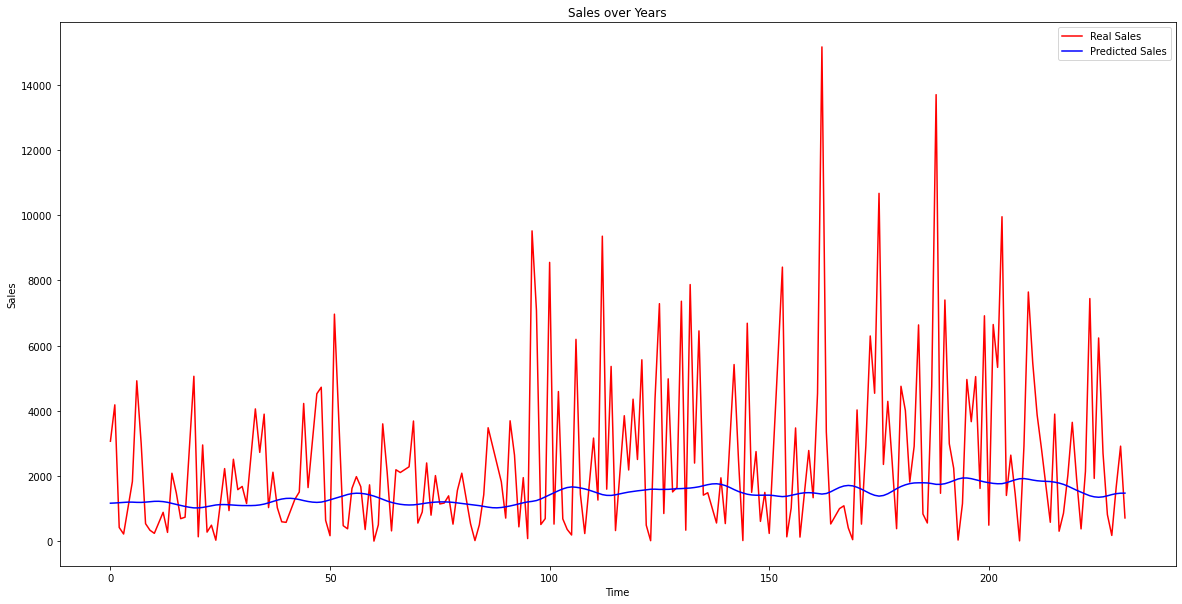

In [151]:
plt.plot(sales_valid[60:], color = 'red', label = 'Real Sales')
plt.plot(predicted_sales2, color = 'blue', label = 'Predicted Sales')
plt.title('Sales over Years')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [152]:
#Menggunakan Seasonal Arima (SARIMA) untuk melakukan forecasting

In [153]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq_musiman = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for parameters in pdq: # looping untuk mengetahui kombinasi parameter musiman untuk SARIMA
    for parameter_musiman in pdq_musiman:
        try:
            mod = sm.tsa.statespace.SARIMAX(dataset_sales,
                                            order=parameters,
                                            seasonal_param_order=parameter_musiman,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #mengetahui nilai AIC dari model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, parameter_musiman, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:27286.893842684796
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:27009.22000204755
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:27009.22000204755
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:27009.22000204755
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:27009.22000204755
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:27009.22000204755
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:27009.22000204755
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:27009.22000204755
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:27009.22000204755
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:27233.430247980526
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2

In [154]:
# Diambil SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:26446.073210719085

In [155]:
model_sarima = sm.tsa.statespace.SARIMAX(dataset_sales,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
hasil = model_sarima.fit() #model fitting
print(hasil.summary().tables[1]) # menampilkan hasil model SARIMA

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1251      0.019      6.753      0.000       0.089       0.161
ma.L1         -0.9696      0.008   -127.451      0.000      -0.985      -0.955
ar.S.L12      -0.0312      0.028     -1.123      0.261      -0.086       0.023
ma.S.L12      -1.0020      0.012    -81.825      0.000      -1.026      -0.978
sigma2      4.523e+06   2.68e-09   1.68e+15      0.000    4.52e+06    4.52e+06


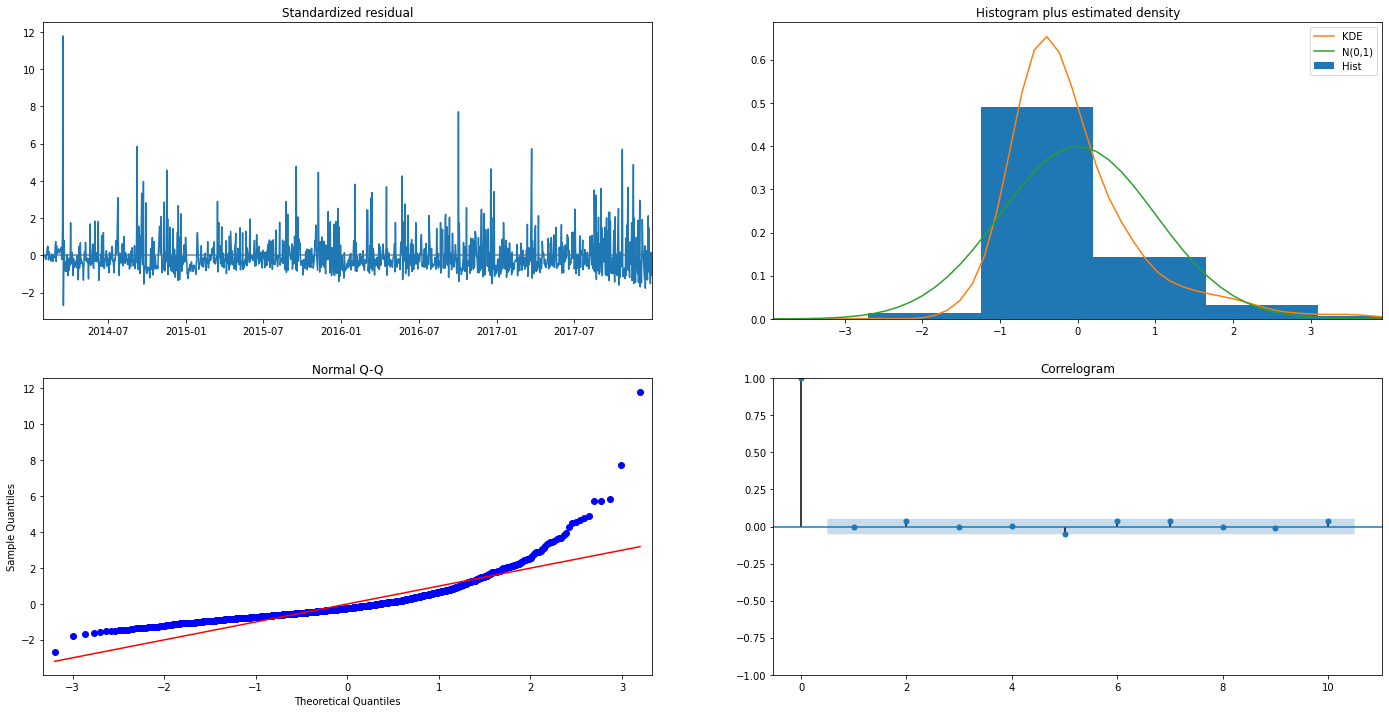

In [156]:
hasil.plot_diagnostics(figsize=(24, 12)) 
#Menghasilkan beberapa grafik: 
# 1. Residual terstandar dalam satuan waktu
# 2. Histogram dan perkiraan kepadatan dari residual terstandar/
# 3. Normal Q-Q, dengan garis referensi normal.
# 4. Korellogram
plt.show()

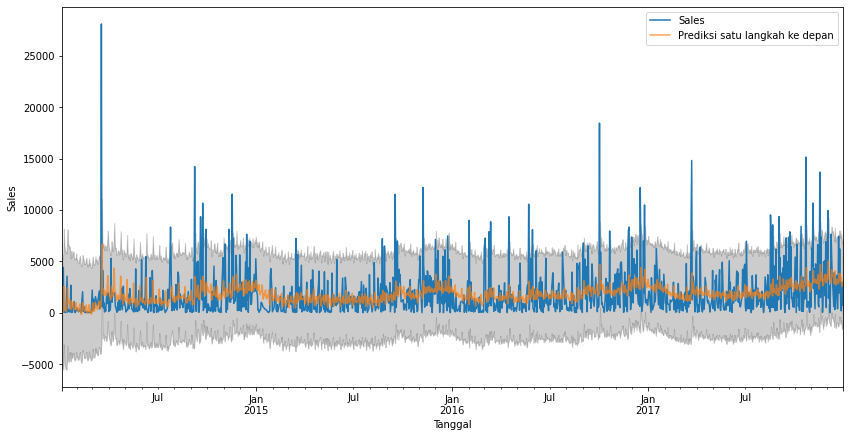

In [157]:
pred = hasil.get_prediction(start=dataset_sales.index[1], dynamic=False) # variabel untuk menunjukkan plot
pred_confidence = pred.conf_int()
ax = dataset_sales['2014':].plot(label='observed') # menunjukkan plot nilai original
pred.predicted_mean.plot(ax=ax, label='Prediksi satu langkah ke depan', alpha=.7, figsize=(14, 7)) # menunjukkan plot untuk nilai prediksi
ax.fill_between(pred_confidence.index,
                pred_confidence.iloc[:, 0],
                pred_confidence.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Sales')
plt.legend()
plt.show()


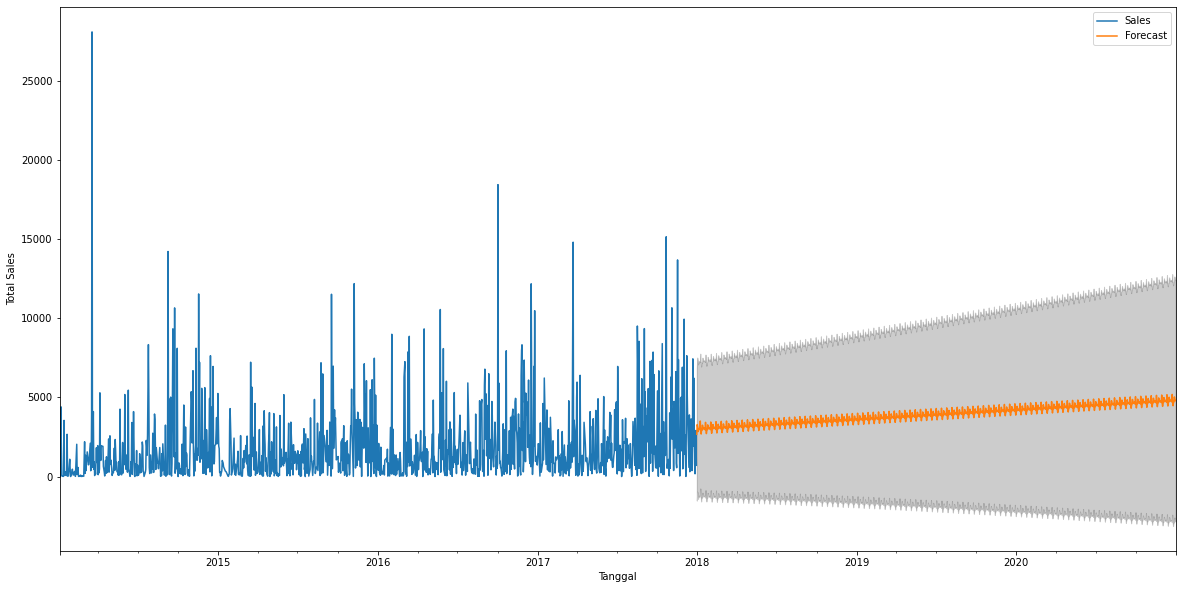

In [158]:
forecaset = hasil.get_forecast(steps = pd.to_datetime('2020-12-31'))
forecast_confidence = forecaset.conf_int()

ax = dataset_sales['2014':].plot(label='observed') # menunjukkan plot nilai original
forecaset.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(forecast_confidence.index,
               forecast_confidence.iloc[:,0],
               forecast_confidence.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Tanggal')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()


In [159]:
y_predicted = pred.predicted_mean
y_truth = dataset_sales['Sales']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_predicted, y_truth[1:])
rmse = sqrt(mse)
print('MSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse, 2))) # menampilkan MSE sampai 2 desimal.

MSE dari hasil prediksi di dalam jangka yang diketahui adalah 2145.85


In [160]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_predicted, y_truth[1:])
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae, 2))) # menampilkan MAE sampai 2 desimal

MAE dari hasil prediksi di dalam jangka yang diketahui adalah 1423.34
